# 기본적인 데이터 분석 도구들: 넘파이(NumPy), 맷플랏립(Matplotlib), 판다스(Pandas)

파이썬은 파워풀하고 유연한 프로그래밍 언어이지만 수학적 분석이나 데이터 시각화를 위한 도구가 내장되어 있지 않습니다. 그렇기 때문에 대부분의 데이터 분석을 위해서는 몇 가지 유용한 외부 라이브러리가 필요합니다. 이번 시간에는 데이터 분석 및 시각화에 매우 일반적인 세 ​​가지 라이브러리를 살펴보겠습니다.

## 넘파이 (NumPy)

첫번째는 넘파이(NumPy)라고 불리는 녀석입니다. 넘파이의 주요 기능은 크게 세 가지라고 볼 수 있습니다.

1. 수학 함수 (`sin`, `log`, `floor` 등)
2. 랜덤 샘플링에 유용한 `random` 계열 하위 모듈
3. 넘파이 n차원 배열 `ndarray` 객체

넘파이에서 배열(array)는 수학적 의미의 $n$차원 행렬과 유사합니다. 예를 들어, 아래와 같은 행렬이 있다고 해보겠습니다.

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

넘파이 배열은 $1$차원, $2$차원, 그 이상의 고차원까지 가능합니다.
여기서 중요한 점은 2차원 배열의 모든 행과 열의 길이가 동일해야 한다는 것입니다. 이는 모든 차원의 배열에 공통적으로 적용되는 사항입니다. 넘파이의 배열을 리스트와 한 번 비교해보겠습니다.

In [1]:
# to access NumPy, we have to import it
import numpy as np

In [2]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [3]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [5]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


왜 두 번째 경우는 리스트와 배열이 다른 형태로 출력되었을까요? 이들의 모양(`shape`)과 데이터 형태(`dtype`)를 한 번 살펴보겠습니다.

In [6]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int64
(3,) object


첫 번째 경우인 `an_array`는 요소의 값들이 정수인 2차원의 3x3 배열입니다. 반면, `non_rectangular_array`는 3개의 `list` 객체를 가지고 있는 1차원의 길이가 3인 배열입니다. 이 둘의 차이에 유의할 필요가 있습니다.

우리는 넘파이에 구현되어 있는 유용한 함수들을 사용해 다양한 형태의 배열을 만들 수 있습니다.

In [7]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.logspace(1, 10, 10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [10]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [12]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

또한 배열 생성 후에 배열의 `dtype`을 변환할 수도 있습니다.

In [13]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)

float64
int64


넘파이가 중요한 이유는 무엇 때문일까요? 그 이유는 배열이라는 것이 코드와 특정 계산을 위한 계산 리소스 측면에서 더 효율적이기 때문입니다. 이러한 넘파이 배열의 효율성은 넘파이가 계산 결과에 대해 연속적인 메모리 블록을 미리 할당한다는 사실에서 비롯됩니다.

이러한 넘파이의 장점을 알아보기 위해 몇 가지 숫자들에 대한 수학적 연산을 한 번 해보겠습니다. 우선 모든 숫자의 합계를 계산한뒤, `list_of_lists`, `an_array` 및 `non_rectangular_array`에 필요한 코드의 차이점들을 살펴보겠습니다.

In [14]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


보시다시피 배열의 숫자를 합산하는 것은 리스트들의 리스트를 합산하는 것보다 훨씬 쉽습니다. 배열은 리스트의 계층 구조를 파헤칠 필요가 없기 때문입니다. 단순히 `ndarray`의 `sum` 메소드를 사용하기만 하면 됩니다. 그렇다면 이러한 기능이 `non_rectangular_array`에서도 여전히 작동할까요?

In [15]:
# what happens here?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


이런 결과가 나온 것에 대해 우리는 `non_rectangular_array`가 `list` 객체의 1차원 배열임을 기억할 필요가 있습니다. 여기서 `sum` 메서드는 숫자들의 합산을 구하는 것이 아닌 첫 번째 리스트, 두 번째 리스트, 세 번째 리스트를 전부 합치려고 합니다. 리스트들의 합산은 결국 문자열의 접합(**concatenation**)이 됩니다.

In [16]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


행이나 열을 개별적으로 합산하려고 할 때 리스트와 배열의 대비는 훨씬 더 명확해집니다.

In [17]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [18]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


일반적으로 리스트보다 배열로 수학 연산을 수행하는 것이 훨씬 더 자연스럽다는 것을 직관적으로 알 수 있습니다.

In [19]:
a = np.array([1, 2, 3, 4, 5])
print(a + 5) # add a scalar
print(a * 5) # multiply by a scalar
print(a / 5) # divide by a scalar (note the float!)

[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0.2 0.4 0.6 0.8 1. ]


In [20]:
b = a + 1
print(a + b) # add together two arrays
print(a * b) # multiply two arrays (element-wise)
print(a / b.astype(float)) # divide two arrays (element-wise)

[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


배열은 벡터(vectors), 행렬(matrices), 텐서(tensors) 등의 역할을 하는 선형 대수학에도 사용할 수 있습니다.

In [21]:
print(np.dot(a, b)) # inner product of two arrays
print(np.outer(a, b)) # outer product of two arrays

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


데이터셋 혹은 부분 데이터셋에 수학 함수들을 쉽게 적용할 수 있기 때문에 배열은 데이터를 표현하고 분석하는 측면에서 우리에게 훨씬 많은 것들을 제공합니다. 대부분의 경우에는 배열을 사용하는 데 있어 문제가 발생하지 않지만, 다만 배열의 모양과 데이터 유형에 대한 제한 사항들에 대해서는 항상 염두에 두는 것이 좋습니다.

`shape` 및 `dtype`에 대한 이러한 제한 사항들로 인해 `ndarray` 객체가 일반 파이썬 `list`에 비해 훨씬 더 성능이 좋습니다. 이러한 이유는 `ndarray`의 특성에 기인하는데, 이렇게 하면 연속 메모리 저장 및 일관된 기능 조회가 가능하기 때문입니다. 파이썬 `list`를 합산하기 위해서 파이썬은 리스트의 각 요소를 더하는 올바른 방법을 먼저 파악해야 합니다. 반면 `ndarray`가 합산될 때, `NumPy`는 이미 각 요소의 유형을 알고 있고 그 유형에는 일관성이 존재하므로, 배열은 각 요소에 대한 올바른 추가 기능을 확인하지 않고 합산할 수 있습니다.

이를 비교하기 위해 아래에서는 100,000개의 랜덤한 요소들의 리스트를 만든 다음 리스트와 배열의 합산시간을 측정해보겠습니다.

In [22]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [23]:
%%timeit 
sum(time_list)

The slowest run took 6.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 457 µs per loop


In [24]:
%%timeit
np.sum(time_arr)

The slowest run took 6.17 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 41 µs per loop


### 범용 함수 (Universal functions)

`NumPy`는 범용 함수(`ufunc`)를 정의하여 배열에서 함수를 효율적으로 실행할 수 있도록 합니다. `np.cos`와 같은 이러한 기능들의 많은 부분들이 내장되어 있으며, 이는 고성능으로 컴파일된 `C` 언어로 구현되어 있습니다. 이러한 함수들은 브로드캐스팅(`broadcasting`)을 수행하여 서로 다른 두 배열 간의 작업을 자동으로 처리할 수 있게 합니다.

### 모양 바꾸기 (Changing Shape)

종종 우리는 특정 작업에 더 적합하도록 하기 위해 어떤 모양의 배열을 그것과 다른 모양으로 바꾸고 싶을 때가 있습니다. 이럴 때는 넘파이의 `reshape` 메서드를 사용하여 배열의 모양을 바꿀 수 있습니다.

In [25]:
mat = np.random.rand(20, 10)

In [26]:
mat.reshape(40, 5).shape

(40, 5)

In [27]:
mat.reshape(30, 5)

ValueError: ignored

In [28]:
mat.ravel().shape

(200,)

In [29]:
mat.transpose().shape

(10, 20)

### 배열 합치기 (Combining arrays)

In [30]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [31]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [32]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [33]:
np.dstack((a, b))

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

### 기본적인 데이터 집계

배열을 사용하는 몇 가지 예를 더 살펴보겠습니다. 이번에는 넘파이의 `random`이라는 하위 모듈을 사용하여 가상의 데이터를 생성해보겠습니다. 데이터 시뮬레이션은 새로운 기술이나 코드를 테스트하고 프로토타입을 만드는 데 유용합니다. 또한 일부 알고리즘의 경우에는 무작위적인 입력변수가 필요하기도 합니다.

In [34]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7))
print(jan_coffee_sales)

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [35]:
# mean sales
print('Mean coffees sold per day in January: %d' % jan_coffee_sales.mean())

Mean coffees sold per day in January: 110


In [36]:
# mean sales for Monday
print('Mean coffees sold on Monday in January: %d' % jan_coffee_sales[:, 1].mean())

Mean coffees sold on Monday in January: 108


In [37]:
# day with most sales
# remember we count dates from 1, not 0!
print('Day with highest sales was January %d' % (jan_coffee_sales.argmax() + 1))

Day with highest sales was January 24


In [38]:
# is there a weekly periodicity?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.81850804066758),
 (Fraction(1, 14), 3.0624177128282795),
 (Fraction(3, 28), 3.6145035763808577),
 (Fraction(1, 7), 8.992489334676053),
 (Fraction(5, 28), 3.689054592513946),
 (Fraction(3, 14), 8.363267066546037),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207648),
 (Fraction(9, 28), 6.846412421396466),
 (Fraction(5, 14), 14.279717692527935),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088778),
 (Fraction(13, 28), 6.579601542582696)]

위에서 사용한 함수들 중 일부는 표준 파이썬에 존재하지는 않으나 넘파이는 이를 제공하고 있습니다. 또한 우리는 배열의 모양을 사용하여 데이터 하위 집합에 대한 통계(예: 월요일에 판매된 평균 커피 수)를 계산할 수도 있습니다. 

다음 섹션에서는 파이썬에서 시각화를 하기 위해 사용되는 대표적인 라이브러리인 맷플랏립에 대해 알아보겠습니다.

## 맷플랏립 (Matplotlib)

맷플랏립은 가장 널리 사용되는 파이썬 시각화 라이브러리입니다. 이 라이브러리는 다양한 유형의 그래프(예: 막대, 산포, 선 등)를 제공하여 데이터를 빠르게 시각화하도록 합니다. 또한 그림 내에서 여러 이미지 또는 이미지 구성 요소를 배열하는 데 유용한 도구를 제공하므로, 우리는 필요에 따라 보다 복잡한 시각화 결과물을 생성할 수도 있습니다.

그렇다면 한 번 데이터들을 시각화해보겠습니다. 다음 셀들에서는 몇 가지 데이터를 생성하고 시각화하는 작업을 수행해보겠습니다. 여기서는 데이터가 만들어지는 방식보다는 데이터가 어떻게 시각화되는지에 대해 초점을 맞출 것입니다. 

In [39]:
import matplotlib.pyplot as plt

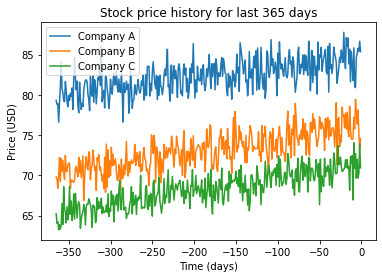

In [40]:
def gen_stock_price(days, initial_price):
    # stock price grows or shrinks linearly
    # not exceeding 10% per year (heuristic)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    # noise will be about 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    return trend + noise

days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
plt.title('Stock price history for last %d days' % days)
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend(['Company A', 'Company B', 'Company C']);

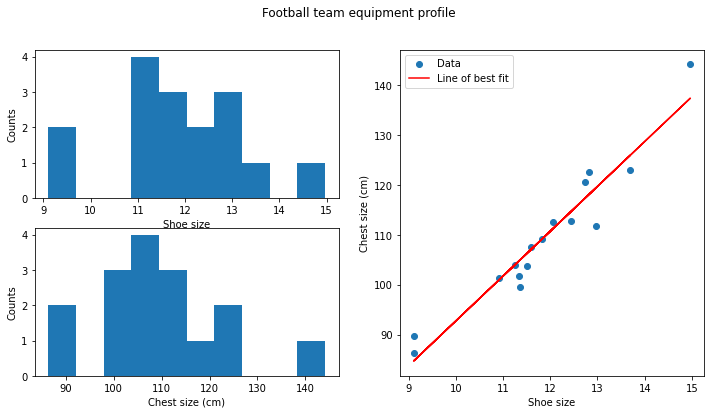

In [41]:
from scipy.stats import linregress

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Football team equipment profile')

ax1 = plt.subplot(221)
ax1.hist(shoes)
ax1.set_xlabel('Shoe size')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(223)
ax2.hist(jerseys)
ax2.set_xlabel('Chest size (cm)')
ax2.set_ylabel('Counts')

ax3 = plt.subplot(122)
ax3.scatter(shoes, jerseys, label='Data')
ax3.set_xlabel('Shoe size')
ax3.set_ylabel('Chest size (cm)')

fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Line of best fit')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1]);

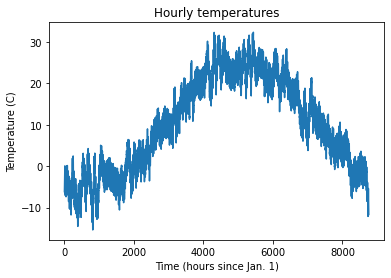

In [42]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Hourly temperatures')
plt.xlabel('Time (hours since Jan. 1)')
plt.ylabel('Temperature (C)');

맷플랏립 패키지는 매우 유연하며 사실 이를 활용한 데이터 시각화의 가능성은 거의 무한대에 가깝습니다. 맷플랏립 및 기타 데이터 시각화 패키지를 탐색하는 좋은 방법은 이를 활용한 예시들이 있는 [갤러리 페이지](https://matplotlib.org/gallery.html)를 참고하는 것입니다.

# 판다스 (Pandas)

넘파이는 전체 데이터셋에 특정 함수를 효율적으로 적용하거나 그 일부를 선택할 수 있게 해주기 때문에 데이터 처리에 유용합니다. 그러나 넘파이의 경우 다른 배열에 저장되어 있는 연관 데이터를 추적하거나 배열에 저장된 데이터들의 의미를 직관적으로 알아내는 것이 쉽지 않습니다.

예를 들어, 이전 섹션에서는 신발 사이즈에 대한 1차원 배열과 저지 사이즈에 대한 1차원 배열이 있었습니다. 문제는 만약 특정 선수의 신발과 저지 사이즈를 조회하고 싶다면 각 배열에서 그것들의 위치를 정확히 기억해야 한다는 점입니다.

혹은 또 다른 예시로써 우리는 2개의 1차원 배열을 결합하여 `n_players` 행과 2개의 열(신발 사이즈용, 저지 사이즈용)이 있는 2차원 어레이를 만들 수도 있습니다. 하지만 만약 데이터를 결합하게 되면, 이제 또다시 우리는 어떤 열이 신발 사이즈이고 어떤 열이 저지 사이즈인지 기억해야만 합니다.

이러한 문제들을 해결하기 위해 판다스 패키지는 파이썬에서 데이터 작업을 위한 매우 강력한 도구인 `DataFrame`을 소개합니다. `DataFrame`은 쉽게 말해 테이블, 즉 표입니다. 각 열은 다른 유형의 데이터를 나타냅니다. 우리는 이를 필드(**field**)라고 부르기도 합니다. 열에 이름을 지정할 수 있으므로 `shoe_size`라는 열과 `jersey_size`라는 열이 있을 수 있습니다. 판다스의 좋은 점은 이름으로 참조할 수 있기 때문에 어느 열이 어느 것인지 기억할 필요가 없다는 것입니다. 각각의 행은 다른 레코드(**record**) 또는 엔티티(**entity**)(예: 플레이어)를 나타냅니다. 판다스에서는 행의 이름도 지정할 수 있으므로 내 배열의 어느 행이 호나우지뉴와 일치하는지 기억하는 대신 행의 이름을 '호나우지뉴'로 지정하고 그의 신발 사이즈와 저지 사이즈를 이름으로 조회할 수 있습니다.

In [43]:
import pandas as pd

players = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', "Samuel Eto'o", 'George Best', 'George Weah', 
           'Roberto Donadoni']
shoes, jerseys = gen_football_team(len(players), 10, 100)

df = pd.DataFrame({'shoe_size': shoes, 'jersey_size': jerseys}, index = players)

df

,shoe_size,jersey_size
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170
Ronaldo,8.291408,80.182757
Yaya Toure,6.312746,65.942012
Frank Rijkaard,8.528853,84.751303
Diego Maradona,9.829515,97.910820
Mohamed Aboutrika,12.398685,130.554214


In [44]:
# we can also make a dataframe using zip

df = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index = players)

df

,shoe_size,jersey_size
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170
Ronaldo,8.291408,80.182757
Yaya Toure,6.312746,65.942012
Frank Rijkaard,8.528853,84.751303
Diego Maradona,9.829515,97.910820
Mohamed Aboutrika,12.398685,130.554214


데이터프레임은 `dict` 혹은 넘파이의 `ndarray`와 유사합니다. 예를 들어, 딕셔너리에서 키를 사용해 항목을 검색하는 것처럼 데이터프레임에서는 이름을  사용하여 열을 검색할 수 있습니다.

In [45]:
print(df['shoe_size'])

Ronaldinho            8.547275
Pele                  7.927346
Lionel Messi         11.155075
Zinedine Zidane      12.259221
Didier Drogba         9.341725
Ronaldo               8.291408
Yaya Toure            6.312746
Frank Rijkaard        8.528853
Diego Maradona        9.829515
Mohamed Aboutrika    12.398685
Samuel Eto'o         11.009701
George Best          10.457628
George Weah           9.399821
Roberto Donadoni      9.125251
Name: shoe_size, dtype: float64


그리고 넘파이 배열과 마찬가지로 쉽게 데이터프레임에 함수를 적용할 수 있습니다.

In [46]:
print(np.log(df))

                   shoe_size  jersey_size
Ronaldinho          2.145612     4.527219
Pele                2.070318     4.385485
Lionel Messi        2.411895     4.615494
Zinedine Zidane     2.506278     4.781008
Didier Drogba       2.234491     4.490053
Ronaldo             2.115220     4.384308
Yaya Toure          1.842571     4.188776
Frank Rijkaard      2.143455     4.439721
Diego Maradona      2.285390     4.584057
Mohamed Aboutrika   2.517590     4.871789
Samuel Eto'o        2.398777     4.669221
George Best         2.347332     4.735297
George Weah         2.240691     4.506914
Roberto Donadoni    2.211045     4.518506


In [47]:
df.mean()

shoe_size       9.613161
jersey_size    96.025702
dtype: float64

데이터프레임에서 함수를 적용하고 데이터를 분석하는 방법에 대해서는 나중에 보다 더 자세히 살펴볼 예정입니다. 여기서는 먼저 데이터프레임에서 데이터를 검색하고 추가하고 및 제거하는 방법에 대해 알아보겠습니다.

우리는 이미 열을 검색하는 방법을 위에서 살펴보았습니다. 그렇다면 행을 검색하기 위해서는 어떻게 해야 할까요? 가장 기본적인 구문은 데이터프레임의 `loc` 메서드를 사용하는 것입니다.

In [48]:
print(df.loc['Ronaldo'])

shoe_size       8.291408
jersey_size    80.182757
Name: Ronaldo, dtype: float64


In [49]:
print(df.loc[['Ronaldo', 'George Best'], 'shoe_size'])

Ronaldo         8.291408
George Best    10.457628
Name: shoe_size, dtype: float64


In [50]:
# can also select position-based slices of data
print(df.loc['Ronaldo':'George Best', 'shoe_size'])

Ronaldo               8.291408
Yaya Toure            6.312746
Frank Rijkaard        8.528853
Diego Maradona        9.829515
Mohamed Aboutrika    12.398685
Samuel Eto'o         11.009701
George Best          10.457628
Name: shoe_size, dtype: float64


숫자로 인덱싱을 하고자 한다면 `iloc` 메서드를 사용할 수도 있습니다.

In [51]:
# for position-based indexing, we will typically use iloc
print(df.iloc[:5])

                 shoe_size  jersey_size
Ronaldinho        8.547275    92.500983
Pele              7.927346    80.277155
Lionel Messi     11.155075   101.037748
Zinedine Zidane  12.259221   119.224510
Didier Drogba     9.341725    89.126170


In [52]:
print(df.iloc[2:4, 0])

Lionel Messi       11.155075
Zinedine Zidane    12.259221
Name: shoe_size, dtype: float64


데이터프레임의 `head`와 `tail` 메서드는 각각 데이터프레임의 맨 처음과 맨 끝 부분만을 보여주는 기능을 담당합니다.

In [53]:
# to see just the top of the DataFrame, use head
df.head()

,shoe_size,jersey_size
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170


In [54]:
# of for the bottom use tail
df.tail()

,shoe_size,jersey_size
Mohamed Aboutrika,12.398685,130.554214
Samuel Eto'o,11.009701,106.614700
George Best,10.457628,113.897279
George Weah,9.399821,90.641667
Roberto Donadoni,9.125251,91.698505


데이터를 검색하는 데 사용하는 것과 동일한 구문을 사용하되 이를 할당과 같이 사용함으로써 데이터프레임 상에 새로운 데이터를 추가할 수도 있습니다.

In [55]:
# adding a new column
df['position'] = np.random.choice(['goaltender', 'defense', 'midfield', 'attack'], size=len(df))
df.head()

,shoe_size,jersey_size,position
Ronaldinho,8.547275,92.500983,goaltender
Pele,7.927346,80.277155,defense
Lionel Messi,11.155075,101.037748,goaltender
Zinedine Zidane,12.259221,119.224510,defense
Didier Drogba,9.341725,89.126170,attack


In [56]:
# adding a new row
df.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfield'}
df.loc['Dylan']

shoe_size             9
jersey_size          91
position       midfield
Name: Dylan, dtype: object


데이터를 삭제하기 위해서는 데이터프레임의 `drop` 메서드를 사용할 수 있습니다.

In [57]:
df.drop('Dylan')

,shoe_size,jersey_size,position
Ronaldinho,8.547275,92.500983,goaltender
Pele,7.927346,80.277155,defense
Lionel Messi,11.155075,101.037748,goaltender
Zinedine Zidane,12.259221,119.224510,defense
Didier Drogba,9.341725,89.126170,attack
Ronaldo,8.291408,80.182757,defense
Yaya Toure,6.312746,65.942012,midfield
Frank Rijkaard,8.528853,84.751303,midfield
Diego Maradona,9.829515,97.910820,attack
Mohamed Aboutrika,12.398685,130.554214,goaltender


In [58]:
df.drop('position', axis=1)

,shoe_size,jersey_size
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170
Ronaldo,8.291408,80.182757
Yaya Toure,6.312746,65.942012
Frank Rijkaard,8.528853,84.751303
Diego Maradona,9.829515,97.910820
Mohamed Aboutrika,12.398685,130.554214


위에서 `df.drop('position', axis=1)`을 실행할 때 이미 우리가 `df.drop('Dylan')`을 실행했는데도 `Dylan`에 대한 항목이 여전히 존재하고 있는 것을 확인할 수 있습니다. `drop`을 사용할 때 주의해야 하는 점이 바로 이 부분입니다. 많은 데이터프레임 함수는 데이터프레임의 복사본을 반환합니다. 따라서 만약 변경 사항을 영구적으로 적용하고자 한다면 `df.drop()`이 반환한 복사본에 `df`를 다시 할당하거나 키워드 `inplace`를 사용해야 합니다.

In [59]:
df = df.drop('Dylan')
print(df)

                   shoe_size  jersey_size    position
Ronaldinho          8.547275    92.500983  goaltender
Pele                7.927346    80.277155     defense
Lionel Messi       11.155075   101.037748  goaltender
Zinedine Zidane    12.259221   119.224510     defense
Didier Drogba       9.341725    89.126170      attack
Ronaldo             8.291408    80.182757     defense
Yaya Toure          6.312746    65.942012    midfield
Frank Rijkaard      8.528853    84.751303    midfield
Diego Maradona      9.829515    97.910820      attack
Mohamed Aboutrika  12.398685   130.554214  goaltender
Samuel Eto'o       11.009701   106.614700     defense
George Best        10.457628   113.897279    midfield
George Weah         9.399821    90.641667     defense
Roberto Donadoni    9.125251    91.698505    midfield


In [60]:
df.drop('position', axis=1, inplace=True)
print(df)

                   shoe_size  jersey_size
Ronaldinho          8.547275    92.500983
Pele                7.927346    80.277155
Lionel Messi       11.155075   101.037748
Zinedine Zidane    12.259221   119.224510
Didier Drogba       9.341725    89.126170
Ronaldo             8.291408    80.182757
Yaya Toure          6.312746    65.942012
Frank Rijkaard      8.528853    84.751303
Diego Maradona      9.829515    97.910820
Mohamed Aboutrika  12.398685   130.554214
Samuel Eto'o       11.009701   106.614700
George Best        10.457628   113.897279
George Weah         9.399821    90.641667
Roberto Donadoni    9.125251    91.698505


판다스에는 데이터 분석을 위한 많은 강력한 도구가 있기 때문에 이 과정의 뒷부분에서는 판다스에 대해 훨씬 더 자세하게 살펴볼 예정입니다.

*Copyright 2021.* 퀀트대디. *This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*